In [153]:
import warnings
warnings.filterwarnings('ignore')

In [154]:
import pandas as pd
import re
import datetime
import matplotlib.pyplot as plt

In [155]:
path = '/Users/vitalybakhvalov/Downloads/Копия Пульс.xlsx'

In [156]:
df = pd.read_excel(path)
# df.head(2)

In [157]:
# df.columns.tolist()

In [158]:
d2 = df[['ЖК','Средняя цена прайс-листа (2019.06), руб./кв.м.','Продано в рынок\n(за 6 месяцев), шт.',  'Продано в рынок\n(за 6 месяцев), кв.м',]]
# d2.head()

## Задаем классы

In [159]:
def typer(x):
    if x <= 295000:
        return 'low'
    elif x > 295000 and x < 400000:
        return 'medium'
    else:
        return 'high'

In [160]:
d2['Класс'] = d2.apply(lambda x: typer(x['Средняя цена прайс-листа (2019.06), руб./кв.м.']), axis =  1);
# d2.head()

# Продажи по классам в первом полугодии

In [161]:
d3 = d2.drop('Средняя цена прайс-листа (2019.06), руб./кв.м.', axis = 1)\
    .groupby('Класс').sum().sort_values(by='Продано в рынок\n(за 6 месяцев), шт.', ascending = 0).reset_index()
d3

,Класс,"Продано в рынок (за 6 месяцев), шт.","Продано в рынок (за 6 месяцев), кв.м"
0,low,24986,1374549
1,medium,1169,86067
2,high,732,75873


# Лидеры продаж в классе Medium

In [162]:
d2[d2['Класс'] == 'medium'].sort_values(by='Продано в рынок\n(за 6 месяцев), шт.', ascending = 0).head(10)

,ЖК,"Средняя цена прайс-листа (2019.06), руб./кв.м.","Продано в рынок (за 6 месяцев), шт.","Продано в рынок (за 6 месяцев), кв.м",Класс
46,Небо,303400.0,328,25361,medium
38,CITY PARK,344000.0,232,18716,medium
59,Prime Park,311500.0,170,13394,medium
95,"Новочеремушкинская, 17",318800.0,95,6369,medium
105,JAZZ,351800.0,76,5910,medium
119,Level Павелецкая,295100.0,57,3473,medium
133,Вавилов ДОМ,333700.0,54,3488,medium
39,Spires,390100.0,46,2984,medium
124,JAZZ,297500.0,32,1102,medium
136,Прайм Тайм,321600.0,27,1676,medium


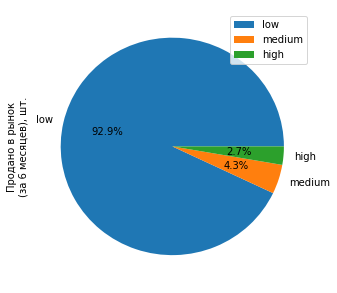

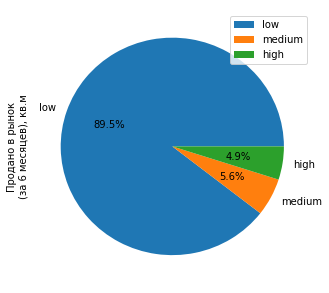

In [163]:
d3.plot.pie(y = 'Продано в рынок\n(за 6 месяцев), шт.', figsize=(5, 5), labels=d3['Класс'],  autopct='%1.1f%%');
d3.plot.pie(y = 'Продано в рынок\n(за 6 месяцев), кв.м', figsize=(5, 5), labels=d3['Класс'],  autopct='%1.1f%%');

In [164]:
# plt.figure(figsize=(16,8))
# # plot chart
# ax1 = plt.subplot(121, aspect='equal')

# d3.plot(kind='pie', y = 'Продано в рынок\n(за 6 месяцев), шт.', ax=ax1, autopct='%1.1f%%', 
#  startangle=90, shadow=False, labels=d3['Класс'], legend = False, fontsize=14);
